In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [66]:
# Function definitions
def draw_vector(v0, v1, ax = None) -> None:
    ax = (ax or plt.gca())
    arrowprops = dict(arrowstyle = "->", 
                      linewidth = 2,
                      shrinkA = 0, shrinkB = 0)
    ax.annotate("", v1, v0, arrowprops = arrowprops)
    return

def plot_digits(data) -> None:
    fig, axes = plt.subplots(4, 10, figsize = (10, 4),
                             subplot_kw = {'xticks':[], 'yticks':[]},
                             gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap = 'binary', interpolation = 'nearest',
                  clim = (0, 16))
    return

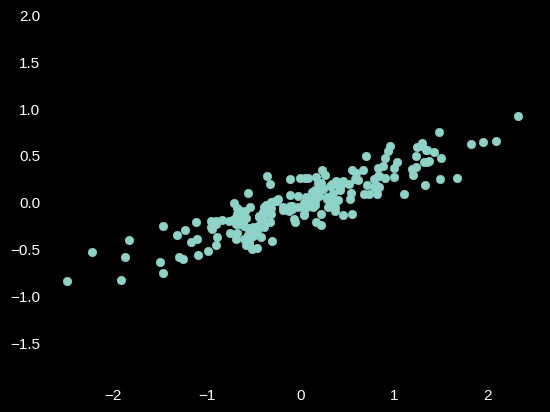

In [46]:
# Create a two-dimensional dataset of 200 randomly selected points
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [47]:
# Unsupervised learning attempts to learn about the relationship between x 
# and y values.
# In PCA, one quantifies this relationship by finding a list of the principal
# axes in the data, and using those axes to describe the dataset.
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X)

PCA(n_components=2)

In [51]:
# The fit learns some quantities from the data, most importantly the 
# components and the explained variance
print(pca.components_, pca.explained_variance_, sep = "\n"*2)

# multiply components by -1 to be equal to the book examples!
pca.components_ = -1 * pca.components_
print(pca.components_, pca.explained_variance_, sep = "\n"*2)


[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]

[0.7625315 0.0184779]
[[ 0.94446029  0.32862557]
 [ 0.32862557 -0.94446029]]

[0.7625315 0.0184779]


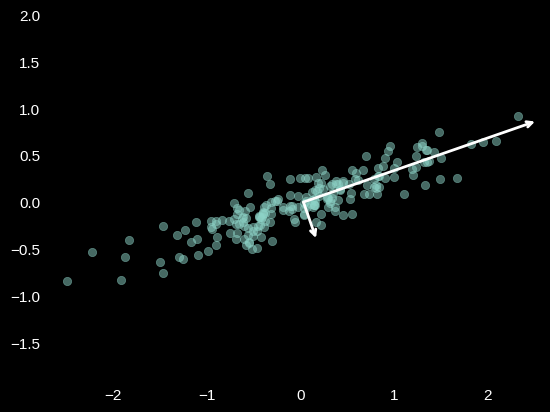

In [52]:
# To see what these numbers mean, let's visualize them as vectors over the 
# input data, using the components to define the direction of the vector,
# and the explained variance to define the squared-length of the vector.

# plot the data
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [53]:
# Using PCa for dimensionality reduction involves zeroing out one or more of
# the smallest principal components, resulting in a lower-dimensional
# projection of the data that preserves the maximal data variance.
# Here is an example of using PCA as a dimensionality reduction transform
pca = PCA(n_components = 1)
pca.fit(X)
X_pca = pca.transform(X)
print(f"original shape: {X.shape}")
print(f"transformed shape: {X_pca.shape}")

original shape: (200, 2)
transformed shape: (200, 1)


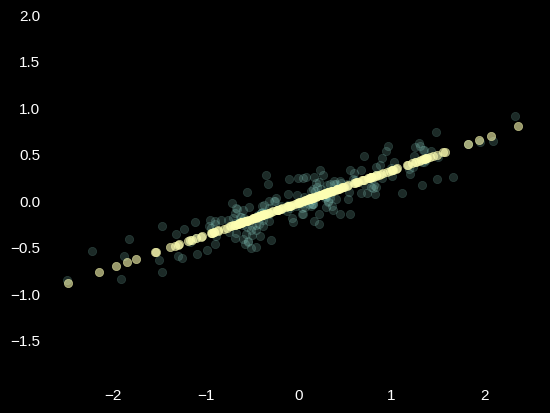

In [55]:
# The transformed data has been reduced to a single dimension. To understand
# the effect of this dimensionality reduction, we can perform the inverse 
# transform of this reduced data and plot it along with the original data

X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha = 0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha = 0.6)
plt.axis('equal');

# The light points are the original data, while the dark points are the 
# projected version. This makes clear what a PCA dimmensionality reduction 
# means: the information along the least important principal axis or axes is
# removed, leaving only the components of the data with the highest variance.
# The fraction of variance that is cut out is roughly a measure of how much
# information is discarded in this reduction of dimensionality.

In [56]:
# The usefulness of the dimensionality reduction may not be entirely apparent
# in only two dimensions, but becomes much more clear when we look at 
# high-dimensional data.
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [58]:
# Recall that the data consists of 8 x 8 pixel images, meaning that they are
# 64-dimensional! To gain some intuition into the relationships between these
# points, we can use PCA to project them to a more manageable number of 
# dimensions, say two.
pca = PCA(2)
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


/tmp/ipykernel_2594/759109006.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', 10))


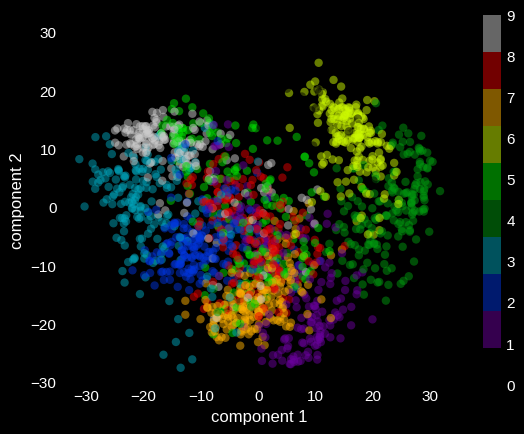

In [64]:
# We can now plot the first two principal components of each point to learn
# about the data
plt.scatter(projected[:, 0], projected[:, 1],
            c = digits.target, edgecolor = 'none', alpha = 0.5,
            cmap = plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

# The full data is a 64-dimensional point cloud, and these points are the 
# projection of each data point along the directions with the largest 
# variance. Essentially, we have found the optimal stretch and rotation in 
# 64-dimensional space that allows us to see the layout of the digits in two
# dimensions.

Text(0, 0.5, 'cumulative explained variance')

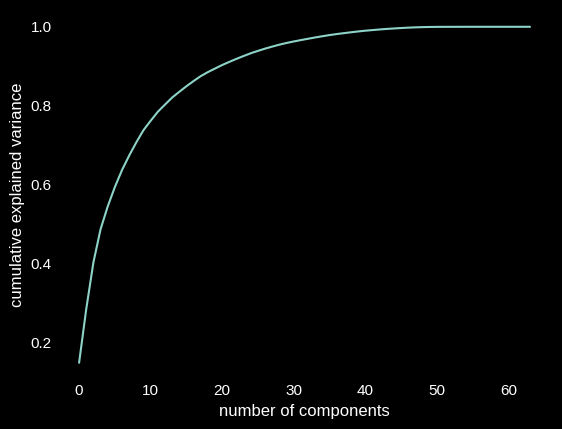

In [65]:
# A vital part of using PCA in practice is the ability to estimate how many
# components are needed to describe the data. We can determine this by 
# looking at the cumulative -explained variance ratio- as a function of the
# number of components.
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
# This curve quantifies how much of the total, 64-dimensional variance is
# contained wiithin the first N components. For example, wee see that with
# the digits the first 10 components contain approximately 75% of the 
# variance, while you need around 50 components to describe close to 100%
# of the variance.
# Here we see that our two-dimensional projection loses a lot of information 
# and that we'd need about 20 components to retain 90% of the variance.
# Looking at this plot for a high-dimensional dataset can help you understand 
# the level of redundancy present in multiple observations.

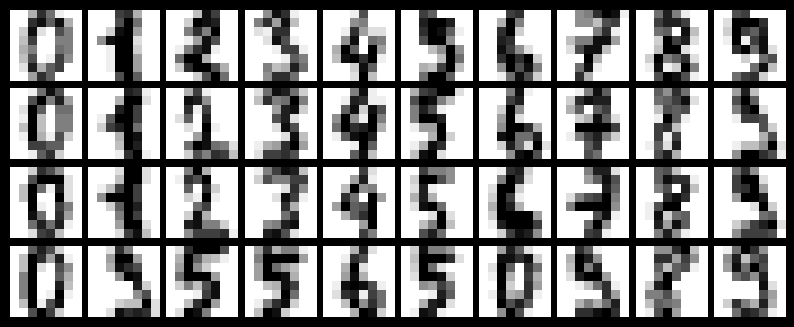

In [67]:
# PCA can also be used as a filtering approach for noisy data. The idea is 
# this: any components with variance much larger than the effect of the
# noise should be relatively unaffected by the noise. So if you reconstruct 
# the data using just the largest subset of principal components, you should 
# be preferentially keeping the signal and throwing out the noise.
# Let's see how this looks with the digits data. First we will plot several 
# of the input noise-free data.
plot_digits(digits.data)

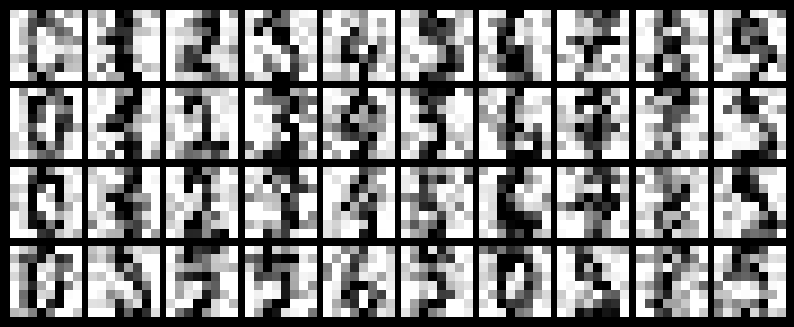

In [68]:
# Now let's add some Gaussian random noise to create a noisy dataset, and replot it
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [78]:
# It's clear by eye that the images are noisy and contain spurious pixels.
# Let's train a PCA on the noisy data, requesting that the projection
# preserve 50% of the variance.
pca = PCA(0.5).fit(noisy)
pca.n_components_

12

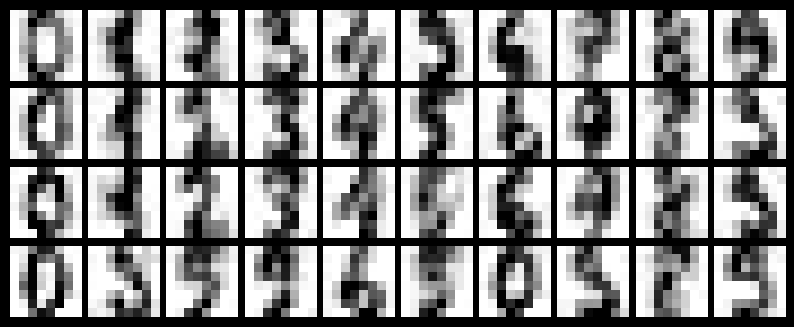

In [79]:
# Here 50% of the variance amounts to 12 principal components. Now we compute
# these components, and then use the inverse of the transform to reconstruct
# the filtered digits
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)
# This signal preserving/noise filtering property makes PCA a very useful
# feature selection routing. For example, rather than training a classifier
# on a very high-dimmensional data, you might instead train the classifier
# on the lower-dimensional representation, which will automatically serve 
# to filter out random noise in the inputs.

In [80]:
# EXAMPLE: Eigenfaces
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person = 60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [82]:
# Let's take a look at the principal axes that span this dataset. Because 
# this is a large dataset, we will use RandomizedPCA, that contains a 
# randomized method to approximate the first N principal components much more
# quickly than the standard PCA estimator, and thus is very useful for
# high-dimensional data. We will take a look at the first 150 components.
from sklearn.decomposition import PCA as RandomizedPCA
pca = RandomizedPCA(n_components=150, 
                    svd_solver='randomized')
pca.fit(faces.data)

PCA(n_components=150, svd_solver='randomized')

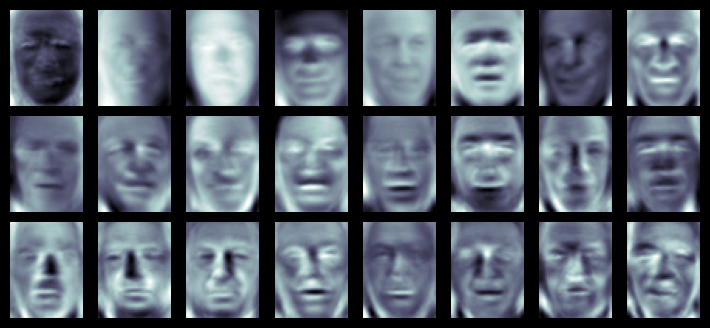

In [86]:
# In this case it can be interesting to visualize the images associated with 
# the first several principal components. The components are know as 
# -eigenvectors-.
fig, axes = plt.subplots(3, 8, figsize = (9, 4),
                         subplot_kw = {'xticks':[], 'yticks':[]},
                         gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap = 'bone')

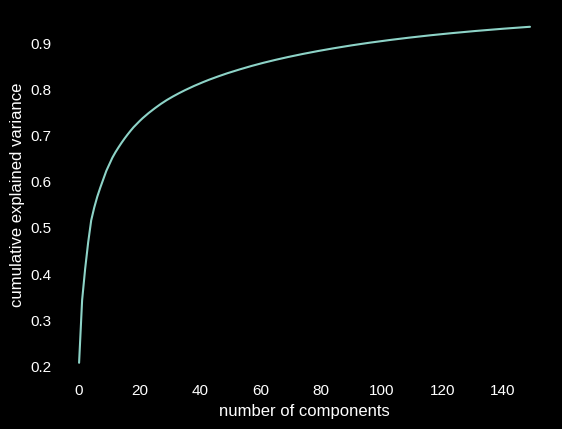

In [87]:
# The results are very interesting, and give us insight into how the images
# vary: for example, the first few eigenfaces (from the top left) seem to be
# associated with the angle of lighting on the face, and later principal
# vectors seem to be picking out certain features, such as eyes, noses, and 
# lips. Let's take a look at the cumulative variance of these components 
# to see how much of the data information the projection is preserving.
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

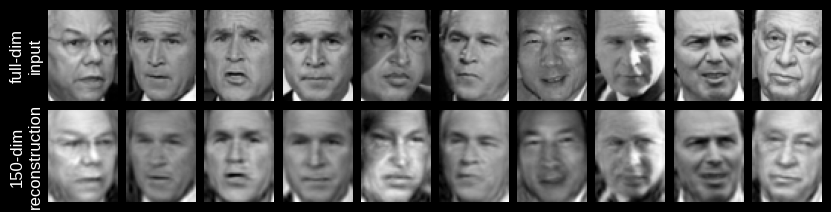

In [89]:
# We see that these 150 components account for just over 90% of the variance.
# That would lead us to believe that using these 150 components, we would
# recover most of the essential characteristics of the data. To make this
# more concrete, we can compare the input images with the images 
# reconstructed from these 150 components.

# Compute the components and projected faces
pca = RandomizedPCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

# Plot the results
fig, ax = plt.subplots(2, 10, figsize = (10, 2.5),
                       subplot_kw = {'xticks':[], 'yticks':[]},
                       gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap = 'binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap = 'binary_r')
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');
# The top row here shows the input iimages, while the bottom row shows the
# reconstruction of the images from just 150 of the ~3000 initial features. 